# 5. Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


############################################ FEATURE SELECTION ############################################
#!pip install scipy
!pip install openpyxl
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression # (this is one possible model to apply inside RFE)
from sklearn.linear_model import LogisticRegressionCV # embedded method - LassoCV would be used in a regression problem
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [ ]:
db = pd.read_excel('/content/db_ultimaversao.xlsx', index_col=None)

In [ ]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Profit (€)', 'perc_expiring_sku', 'expiring_date',
       'labelling_date', 'sell_date', 'sold', 'type', 'selling_square_ft',
       'district', 'new_pvp', 'discount', 'Margem_num', 'selling_day',
       'selling_day_of_week', 'vida_util_apos_label', 'dias_sell_labelling',
       'labelling_day_of_week', 'labelling_day', 'new_pvp_calculado',
       'diferenca_new_pvp', 'profit_calculado', 'diferenca_profit',
       'dif_sell_labelling_date', 'dif_exp_labelling_date'],
      dtype='object')

In [ ]:
#criar 1 variável, sendo dummy de labelling_day, em que queremos saber se o dia é anterior ou igual a 8, outra a 15 e outra a 23

# Create the 'labelling_day_dummy' variable
db['labelling_day_8'] = (db['labelling_day'] <= 8)
db['labelling_day_15'] = (db['labelling_day'] <= 15) & (db['labelling_day'] > 8)
db['labelling_day_23'] = (db['labelling_day'] <= 23) & (db['labelling_day'] > 15)

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),perc_expiring_sku,type,selling_square_ft,district,...,vida_util_apos_label,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,dif_sell_labelling_date,dif_exp_labelling_date,labelling_day_8,labelling_day_15,labelling_day_23
0,1,1,marca1,4.22,1,260.0,0.010050,Large,4762.0,Évora,...,2,Friday,1,2.11,0.0,1.0,2,True,False,False
1,1,1,marca1,3.96,1,260.0,0.005025,Large,4762.0,Évora,...,1,Friday,1,1.98,0.0,NaN,1,True,False,False
2,1,1,marca1,4.74,1,260.0,0.010050,Large,4762.0,Évora,...,2,Friday,1,2.37,0.0,2.0,2,True,False,False
3,1,1,marca1,4.20,1,260.0,0.010050,Large,4762.0,Évora,...,2,Friday,1,2.10,0.0,1.0,2,True,False,False
4,1,1,marca1,4.62,1,260.0,0.010050,Large,4762.0,Évora,...,2,Friday,1,2.31,0.0,2.0,2,True,False,False


## 5.1 VARIÁVEIS CATEGORICAS


### Chi-Square (Filter Method) - SelectKBest

    

In [ ]:
db_chisquare=db
db_chisquare

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date,dif_exp_labelling_date,labelling_day_8,labelling_day_15,labelling_day_23
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,1,2.110,0.00,0.34,0.0,1.0,2,True,False,False
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,1,1.980,0.00,0.32,0.0,NaN,1,True,False,False
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,1,2.370,0.00,0.38,0.0,2.0,2,True,False,False
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,1,2.100,0.00,0.34,0.0,1.0,2,True,False,False
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,1,2.310,0.00,0.37,0.0,2.0,2,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150048,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,3,1.245,0.01,0.14,0.0,NaN,16,True,False,False
150049,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,1,1.245,0.01,0.14,0.0,1.0,18,True,False,False
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,1,1.245,0.01,0.14,0.0,1.0,18,True,False,False
150051,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,6,2.443,0.00,0.46,0.0,5.0,11,True,False,False


In [ ]:
db_chisquare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150053 entries, 0 to 150052
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   idstore                  150053 non-null  int64         
 1   sku                      150053 non-null  int64         
 2   brand                    150053 non-null  object        
 3   oldpvp                   150053 non-null  float64       
 4   labelqty                 150053 non-null  int64         
 5   weight (g)               150053 non-null  float64       
 6   Payment_method           150053 non-null  object        
 7   Profit (€)               150053 non-null  float64       
 8   perc_expiring_sku        150053 non-null  float64       
 9   expiring_date            150053 non-null  datetime64[ns]
 10  labelling_date           150053 non-null  datetime64[ns]
 11  sell_date                80511 non-null   datetime64[ns]
 12  sold            

#### Usando Label Encoder

In [ ]:
# 1. Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

# 2. Remove irrelevant columns (same as before)
cols_to_remove = [
    "Payment_method", "Profit (€)", "profit_calculado", "diferenca_profit",
    "dias_sell_labelling", "sell_date", "labelling_date", "expiring_date","selling_day_of_week"
]

db_chisquare.drop(columns=cols_to_remove, inplace=True, errors="ignore")

# 3. Select categorical features (same as before)
cat_cols = db_chisquare.select_dtypes(include=["object", "bool"]).columns.tolist()
print(cat_cols)

# 4. Encode categorical features using LabelEncoder
db_chisquare_encoded = db_chisquare[cat_cols].copy()
le = LabelEncoder()
for col in cat_cols:
    db_chisquare_encoded[col] = le.fit_transform(db_chisquare_encoded[col].astype(str))

print(db_chisquare_encoded)
# 5. Apply Chi-Square test within StratifiedKFold
X = db_chisquare_encoded
y = db_chisquare["sold"]
alpha=0.05
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    selector = SelectKBest(score_func=chi2, k='all')
    selector.fit(X_train, y_train)  # Fit on training data of the current fold

    # 6. Organize and display results (similar to before)
    chi2_scores = selector.scores_
    chi2_pvalues = selector.pvalues_
    results_db_chisquare = pd.DataFrame({
        "Feature": cat_cols,
        "Chi2 Score": chi2_scores,
        "p-value": chi2_pvalues,
        "Significant (α = 0.05)": chi2_pvalues < alpha
    }).sort_values(by="Chi2 Score", ascending=False)
    print(f"\nResults for Fold {skf.get_n_splits(X, y)}:")  # Indicate the fold number
    print(results_db_chisquare)

['brand', 'sold', 'type', 'district', 'labelling_day_of_week', 'labelling_day_8', 'labelling_day_15', 'labelling_day_23']
        brand  sold  type  district  labelling_day_of_week  labelling_day_8  \
0           0     1     0        17                      0                1   
1           0     0     0        17                      0                1   
2           0     1     0        17                      0                1   
3           0     1     0        17                      0                1   
4           0     1     0        17                      0                1   
...       ...   ...   ...       ...                    ...              ...   
150048     11     0     1        16                      3                1   
150049     11     1     1         6                      0                1   
150050     11     1     1         6                      0                1   
150051     16     1     2        10                      6                1   
150052   

'Payment_method' e "selling_day_of_week" não são considerados porque trazem data leakage (são informações do futuro)

#### Usando Get_dummies

In [ ]:
db_chisquare_dummies=db

In [ ]:
# 1. Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

# 2. Remove irrelevant columns (same as before)
cols_to_remove = [
    "Payment_method", "Profit (€)", "profit_calculado", "diferenca_profit",
    "dias_sell_labelling", "sell_date", "labelling_date", "expiring_date","selling_day_of_week"
]
# retirei "selling_day_of_week" - Andreia Campos
db_chisquare_dummies.drop(columns=cols_to_remove, inplace=True, errors="ignore")

# 3. Select categorical features (same as before)
cat_cols = db_chisquare_dummies.select_dtypes(include="object").columns.tolist()
print(cat_cols)

# 4. Encode categorical features using LabelEncoder
db_chisquare_dummies_encoded = db_chisquare_dummies[cat_cols].copy()


db_chisquare_dummies_encoded = pd.get_dummies(db_chisquare_dummies[cat_cols], drop_first=False)


# 5. Apply Chi-Square test within StratifiedKFold
X = db_chisquare_dummies_encoded
y = db_chisquare_dummies["sold"]
alpha=0.05
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    selector = SelectKBest(score_func=chi2, k='all')
    selector.fit(X_train, y_train)  # Fit on training data of the current fold

    # 6. Organize and display results (similar to before)
    chi2_scores = selector.scores_
    chi2_pvalues = selector.pvalues_
    results_db_chisquare_dummies = pd.DataFrame({
        "Feature": X_train.columns,
        "Chi2 Score": chi2_scores,
        "p-value": chi2_pvalues,
        "Significant (α = 0.05)": chi2_pvalues < alpha
    }).sort_values(by="Chi2 Score", ascending=False)
    print(f"\nResults for Fold {skf.get_n_splits(X, y)}:")  # Indicate the fold number
    print(results_db_chisquare)

['brand', 'type', 'district', 'labelling_day_of_week']

Results for Fold 5:
                 Feature    Chi2 Score   p-value  Significant (α = 0.05)
1                   sold  55634.000000  0.000000                    True
0                  brand  21300.037497  0.000000                    True
3               district     14.384727  0.000149                    True
4  labelling_day_of_week      6.656916  0.009877                    True
5        labelling_day_8      5.958581  0.014646                    True
6       labelling_day_15      5.615230  0.017805                    True
7       labelling_day_23      4.420470  0.035510                    True
2                   type      0.053797  0.816584                   False

Results for Fold 5:
                 Feature    Chi2 Score   p-value  Significant (α = 0.05)
1                   sold  55634.000000  0.000000                    True
0                  brand  21300.037497  0.000000                    True
3               district   

drop: type, selling day of the week e sold (leakage), brand (acabamos por retirar por ser uma variável muito desbalanceada apesar dos métodos a indicarem como relevantes);

keep: district, labelling_day_of_week, labbeling_day_8 e labbeling_day_15

tentar com e sem dia labbeling_day_23




| Variáveis | LabelEncoder | Get_Dummies | Incluir no modelo? |
| --- | --- | --- | --- |
brand      | 5 YES | 5 YES | retirar - muito desbalanceado |
district             | 5 YES | 5 YES | manter |
labelling_day_of_week             | 5 YES | 5 YES | manter |
labelling_day_8         | 5 YES | 5 YES | manter |
labelling_day_15         | 5 YES | 5 YES | manter |
labelling_day_23 | 4 YES | 5 YES | tentar com e sem |
type    | 0 YES | 0 YES | retirar |


## 5.2 VARIÀVEIS NUMÉRICAS

In [ ]:
db_chisquare.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Profit (€)', 'perc_expiring_sku', 'expiring_date',
       'labelling_date', 'sell_date', 'sold', 'type', 'selling_square_ft',
       'district', 'new_pvp', 'discount', 'Margem_num', 'selling_day',
       'selling_day_of_week', 'vida_util_apos_label', 'dias_sell_labelling',
       'labelling_day_of_week', 'labelling_day', 'new_pvp_calculado',
       'diferenca_new_pvp', 'profit_calculado', 'diferenca_profit',
       'dif_sell_labelling_date', 'dif_exp_labelling_date', 'labelling_day_8',
       'labelling_day_15', 'labelling_day_23'],
      dtype='object')

In [ ]:
db_chisquare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150053 entries, 0 to 150052
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   idstore                  150053 non-null  int64         
 1   sku                      150053 non-null  int64         
 2   brand                    150053 non-null  object        
 3   oldpvp                   150053 non-null  float64       
 4   labelqty                 150053 non-null  int64         
 5   weight (g)               150053 non-null  float64       
 6   Payment_method           150053 non-null  object        
 7   Profit (€)               150053 non-null  float64       
 8   perc_expiring_sku        150053 non-null  float64       
 9   expiring_date            150053 non-null  datetime64[ns]
 10  labelling_date           150053 non-null  datetime64[ns]
 11  sell_date                80511 non-null   datetime64[ns]
 12  sold            

In [ ]:
skf2 = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

In [ ]:
numeric_cols = db.select_dtypes(include='number').columns
db_numeric = db[numeric_cols]
print(numeric_cols)
# db_numeric

Index(['idstore', 'sku', 'oldpvp', 'labelqty', 'weight (g)', 'Profit (€)',
       'perc_expiring_sku', 'selling_square_ft', 'new_pvp', 'discount',
       'Margem_num', 'selling_day', 'vida_util_apos_label',
       'dias_sell_labelling', 'labelling_day', 'new_pvp_calculado',
       'diferenca_new_pvp', 'profit_calculado', 'diferenca_profit',
       'dif_sell_labelling_date', 'dif_exp_labelling_date'],
      dtype='object')


### Variância

In [ ]:
X2 = db_numeric.drop(['idstore', 'sku', 'new_pvp_calculado', 'diferenca_new_pvp', 'dif_sell_labelling_date',
       'dif_exp_labelling_date', 'selling_day','dias_sell_labelling','profit_calculado','diferenca_profit'], axis = 1)
y2 = db['sold'].copy()

In [ ]:
X2, X2_test, y2, y2_test = train_test_split(X2, y2,
                                        train_size = 0.9,
                                        random_state = 99,
                                        stratify = y2)

In [ ]:
def apply_variance(X2_train):
    print(X2_train.var(numeric_only=True).apply(lambda x2: f"{x2:.5f}"))

In [ ]:
def select_features_variance(X2,y2):
    count = 1
    for train_index, val_index in skf.split(X2,y2):
        X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        apply_variance(X2_train)

        count+=1

In [ ]:
select_features_variance(X2,y2)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
oldpvp                         0.32103
labelqty                       0.00000
weight (g)                  3302.10071
Profit (€)                     0.00580
perc_expiring_sku              0.04957
selling_square_ft       29704860.63036
new_pvp                        0.15476
discount                       0.00135
Margem_num                     0.00109
vida_util_apos_label           1.71003
labelling_day                 73.96949
dtype: object
_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________
o

A variavél labelqty é constante (=0), então iremos remove-la.

In [ ]:
X2 = X2.drop(['labelqty'], axis = 1)

In [ ]:
X2.columns

Index(['oldpvp', 'weight (g)', 'Profit (€)', 'perc_expiring_sku',
       'selling_square_ft', 'new_pvp', 'discount', 'Margem_num',
       'vida_util_apos_label', 'labelling_day'],
      dtype='object')

In [ ]:
X3=X2
y3=y2

### Spearman

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
def apply_correlation(X2_train):
    correlation_data = X2_train.copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only=True)

    threshold = 0.7
    correlated_pairs = []

    for i in range(len(matrix.columns)):
        for j in range(i + 1, len(matrix.columns)):
            corr_value = matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                correlated_pairs.append({
                    'Feature 1': matrix.columns[i],
                    'Feature 2': matrix.columns[j],
                    'Correlation': corr_value
                })

    # Converter em DataFrame para melhor visualização
    correlated_df = pd.DataFrame(correlated_pairs)

    if not correlated_df.empty:
        print("\nPares de features com correlação (|ρ| ≥ 0.7):")
        print(correlated_df.sort_values(by='Correlation', ascending=False))
    else:
        print("\nNenhum par de features com correlação ≥ 0.7 foi encontrado.")

    cor_heatmap(matrix)

In [ ]:
def redundant_features(X2,y2):
    count = 1
    for train_index, val_index in skf.split(X2,y2):
        X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using spearman correlation
        apply_correlation(X2_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

Pares de features com correlação (|ρ| ≥ 0.7):
           Feature 1             Feature 2  Correlation
1             oldpvp               new_pvp     0.992499
3  perc_expiring_sku  vida_util_apos_label     0.819099
2         Profit (€)               new_pvp     0.790278
0             oldpvp            Profit (€)     0.780882


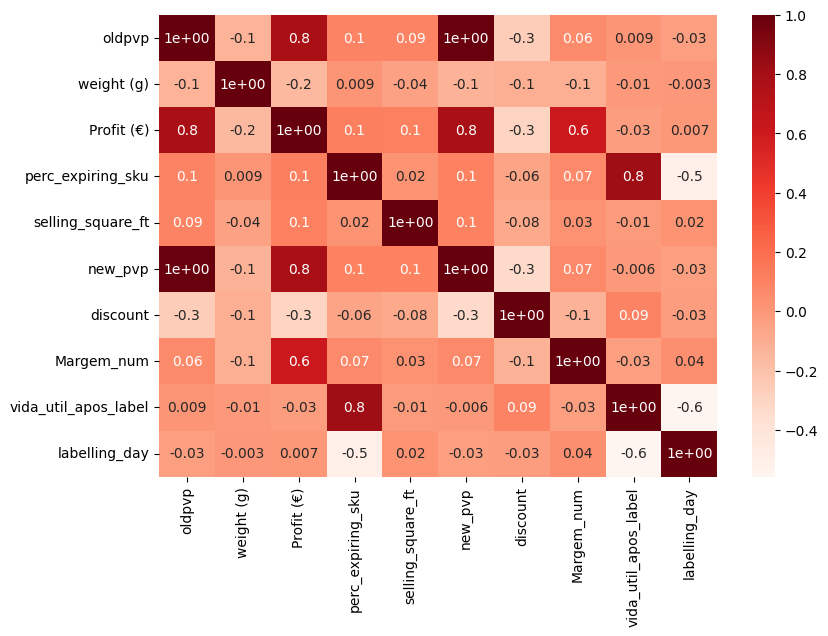

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

Pares de features com correlação (|ρ| ≥ 0.7):
           Feature 1             Feature 2  Correlation
1             oldpvp               new_pvp     0.992332
3  perc_expiring_sku  vida_util_apos_label     0.817399
2         Profit (€)               new_pvp     0.790166
0             oldpvp            Profit (€)     0.780593


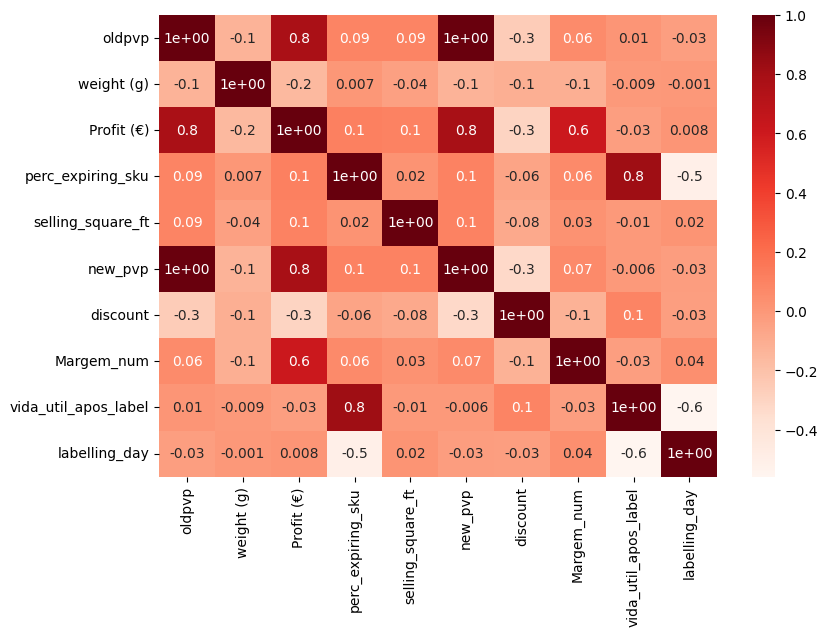

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

Pares de features com correlação (|ρ| ≥ 0.7):
           Feature 1             Feature 2  Correlation
1             oldpvp               new_pvp     0.992379
3  perc_expiring_sku  vida_util_apos_label     0.816325
2         Profit (€)               new_pvp     0.788773
0             oldpvp            Profit (€)     0.779191


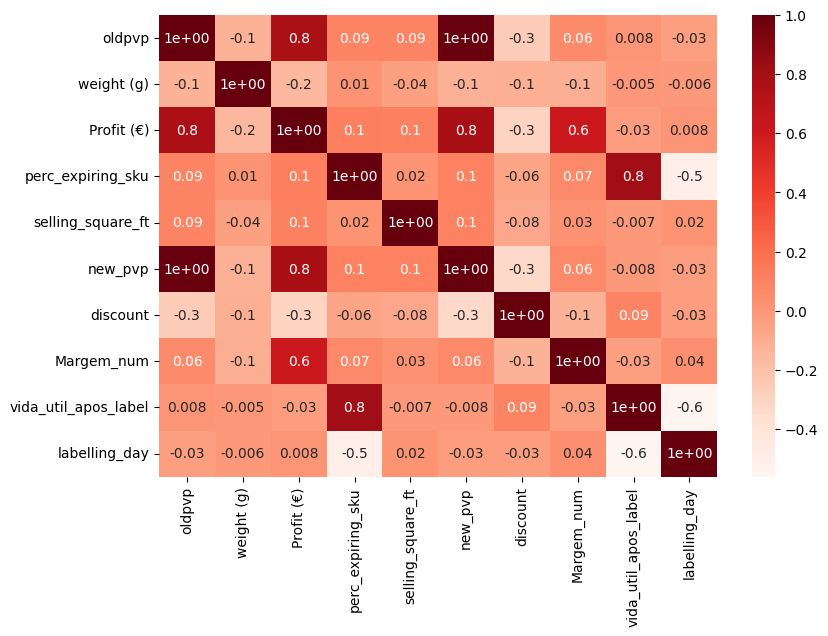

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

Pares de features com correlação (|ρ| ≥ 0.7):
           Feature 1             Feature 2  Correlation
1             oldpvp               new_pvp     0.992377
3  perc_expiring_sku  vida_util_apos_label     0.816937
2         Profit (€)               new_pvp     0.789583
0             oldpvp            Profit (€)     0.780039


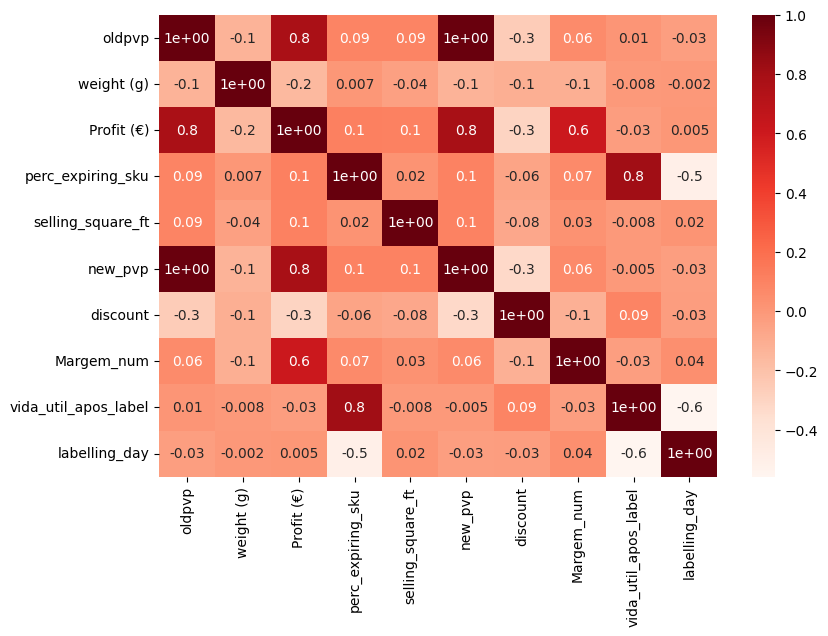

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

Pares de features com correlação (|ρ| ≥ 0.7):
           Feature 1             Feature 2  Correlation
1             oldpvp               new_pvp     0.992164
3  perc_expiring_sku  vida_util_apos_label     0.814164
2         Profit (€)               new_pvp     0.790354
0             oldpvp            Profit (€)     0.780767


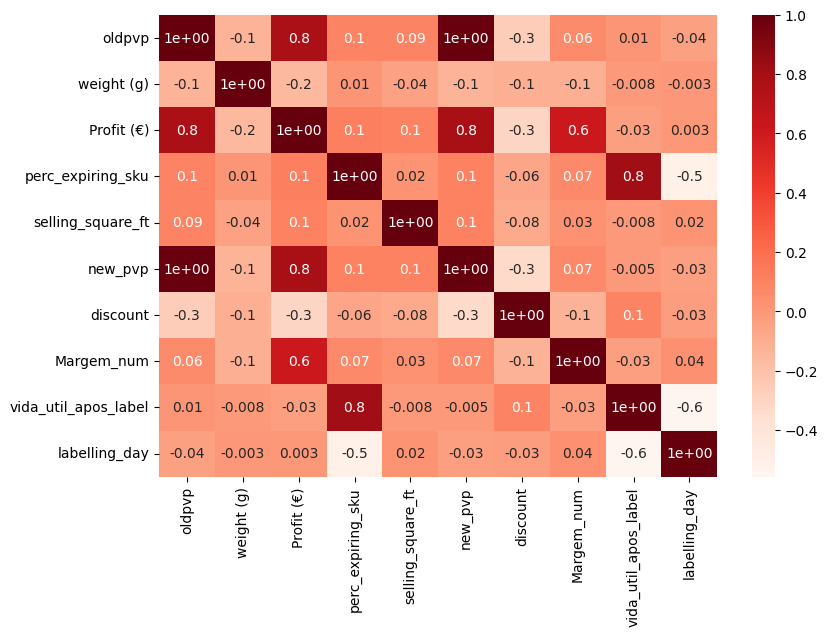

In [ ]:
redundant_features(X2, y2)

In [ ]:
#Excluir variaveis com correlação >= |0.8|
X2 = X2.drop(['oldpvp','vida_util_apos_label','Profit (€)'], axis = 1)

### Arvore de Decisão


In [ ]:
def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
def apply_dt(X2_train, y2_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X2_train, y2_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X2_train.columns)
    plot_importance(feature_importances, 'DT')

In [ ]:
def select_best_features_dt(X2, y2):
    count = 1
    for train_index, val_index in skf.split(X2,y2):
        X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        apply_dt(X2_train, y2_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


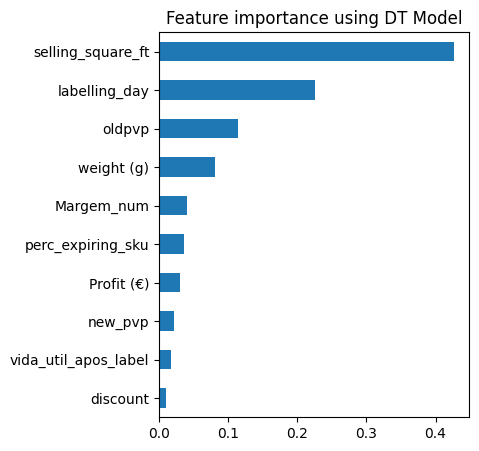

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


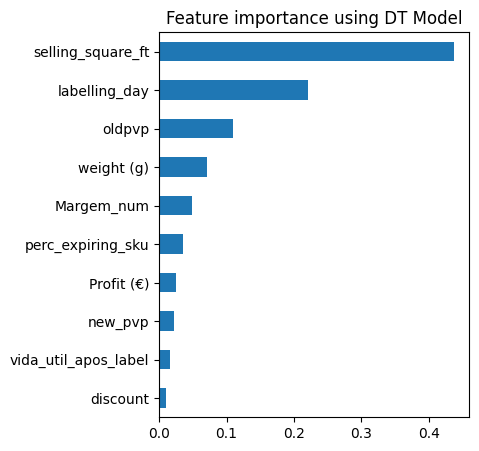

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


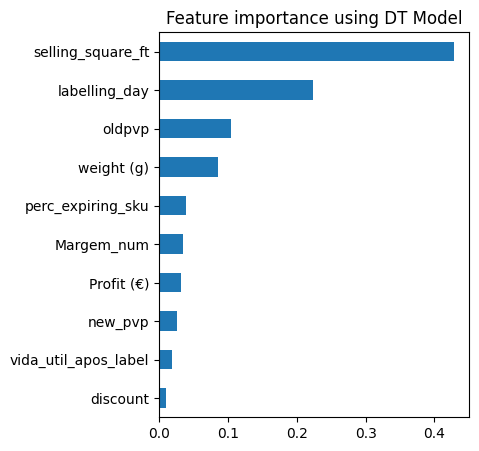

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


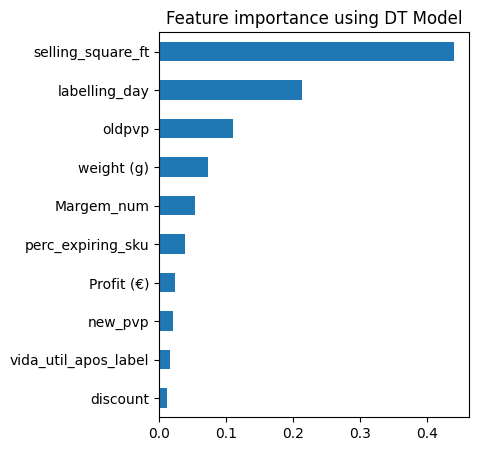

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


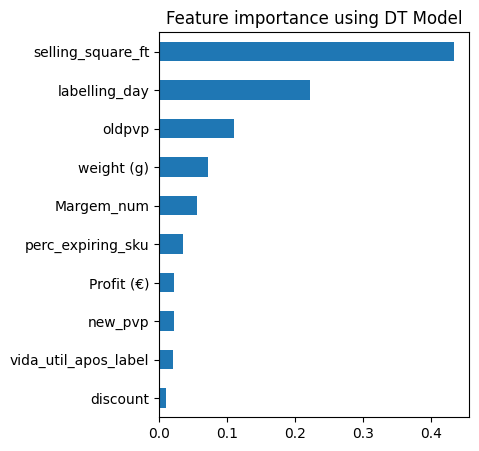

In [ ]:
select_best_features_dt(X3, y3)

Com base na correlação de spearman e na arvore de decisão, iremos remover as seguintes variáveis: 'old_pvp','vida_util_apos_label', 'Profit (€)' e deixaremos a discount, apesar da DT a considerar irrelevante (dado que parece ser das mais importantes no âmbito do problema)

In [ ]:
db_numeric = db_numeric.drop(['oldpvp','vida_util_apos_label', 'Profit (€)','labelqty'], axis = 1)

Neste momento, já removemos as variáveis correlacionadas e podemos aplicar técnicas que utilizam regressão.

Para aplicar Lasso Regression e RFE (usando Regressão Logística como estimador), é necessário escalar os dados previamente.

No caso das Árvores de Decisão, isso não é necessário – os resultados devem ser semelhantes com ou sem os dados escalados.

### Recursive Feature Elimination (RFE)

In [ ]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

### Lasso e DT

In [ ]:
db_numeric.columns

Index(['idstore', 'sku', 'weight (g)', 'perc_expiring_sku',
       'selling_square_ft', 'new_pvp', 'discount', 'Margem_num', 'selling_day',
       'dias_sell_labelling', 'labelling_day', 'new_pvp_calculado',
       'diferenca_new_pvp', 'profit_calculado', 'diferenca_profit',
       'dif_sell_labelling_date', 'dif_exp_labelling_date'],
      dtype='object')

In [ ]:
X4=db_numeric.drop(['idstore', 'sku', 'new_pvp_calculado', 'diferenca_new_pvp', 'dif_sell_labelling_date',
       'dif_exp_labelling_date', 'selling_day','dias_sell_labelling','profit_calculado','diferenca_profit'], axis = 1)
y4=db['sold']

In [ ]:
def apply_lasso(X_train, y_train):
    lasso = LogisticRegressionCV(penalty='l1', solver='saga').fit(X_train, y_train)
    coef = pd.Series(abs(lasso.coef_[0]), index = X_train.columns)
    plot_importance(coef,'Lasso')

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

In [ ]:
def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index=X_train.index)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        # check which features to use using lasso
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
weight (g)            True
perc_expiring_sku     True
selling_square_ft     True
new_pvp               True
discount             False
Margem_num           False
labelling_day         True
dtype: bool

----------------- LASSO ----------------------


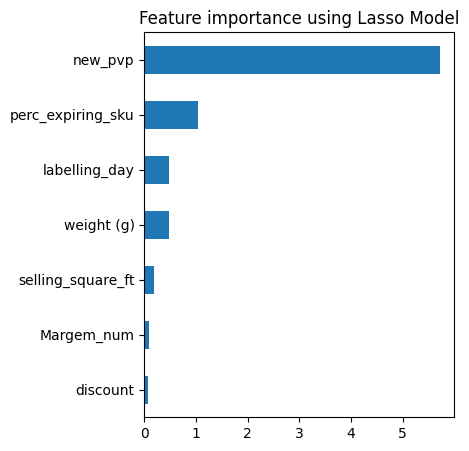


----------------- DT ----------------------


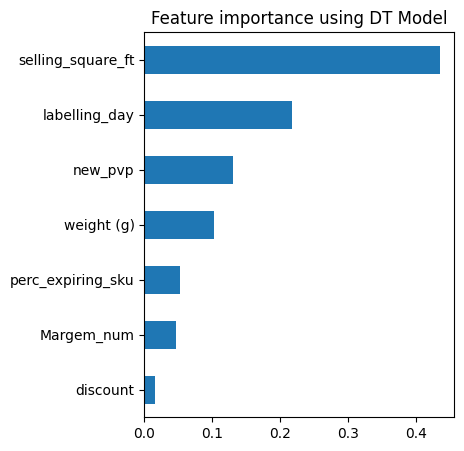

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
weight (g)            True
perc_expiring_sku     True
selling_square_ft     True
new_pvp               True
discount             False
Margem_num           False
labelling_day         True
dtype: bool

----------------- LASSO ----------------------


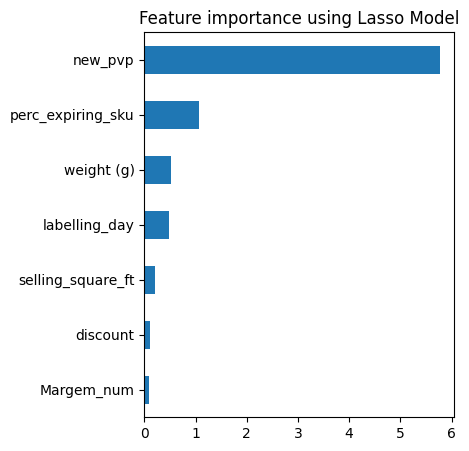


----------------- DT ----------------------


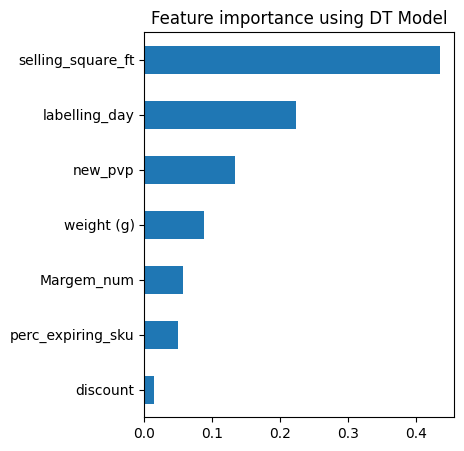

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
weight (g)            True
perc_expiring_sku     True
selling_square_ft     True
new_pvp               True
discount             False
Margem_num           False
labelling_day         True
dtype: bool

----------------- LASSO ----------------------


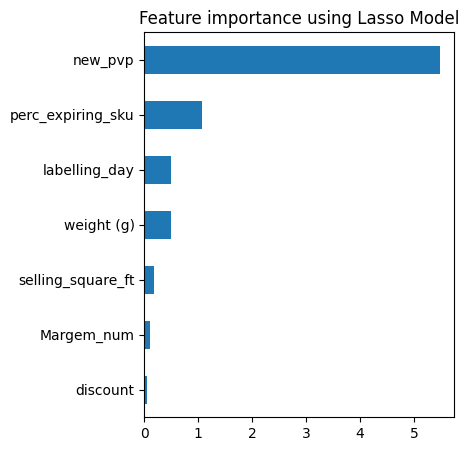


----------------- DT ----------------------


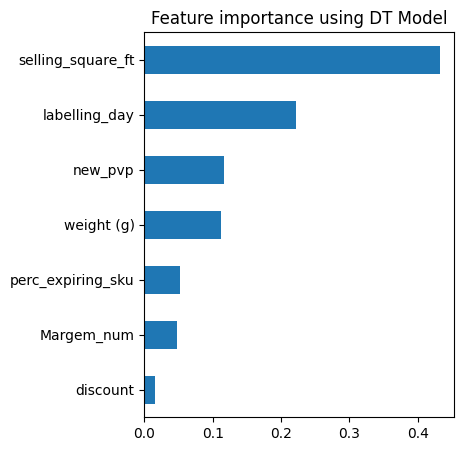

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
weight (g)            True
perc_expiring_sku     True
selling_square_ft     True
new_pvp               True
discount             False
Margem_num           False
labelling_day         True
dtype: bool

----------------- LASSO ----------------------


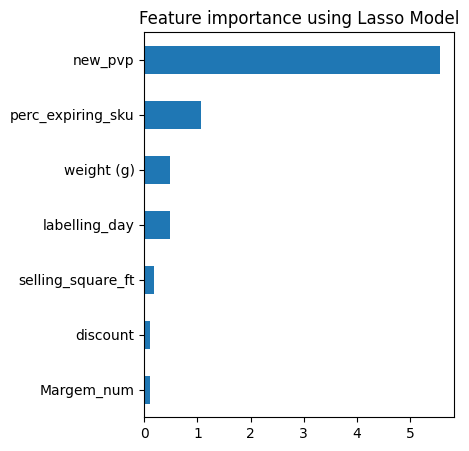


----------------- DT ----------------------


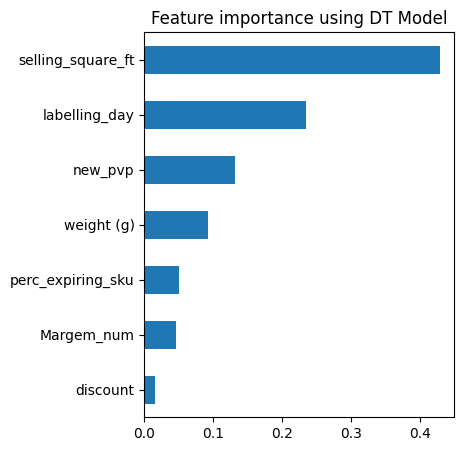

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
weight (g)            True
perc_expiring_sku     True
selling_square_ft     True
new_pvp               True
discount             False
Margem_num           False
labelling_day         True
dtype: bool

----------------- LASSO ----------------------


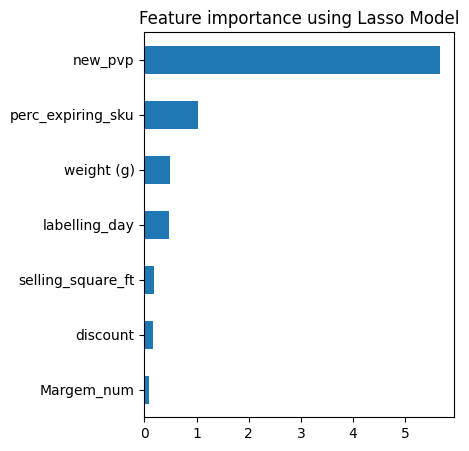


----------------- DT ----------------------


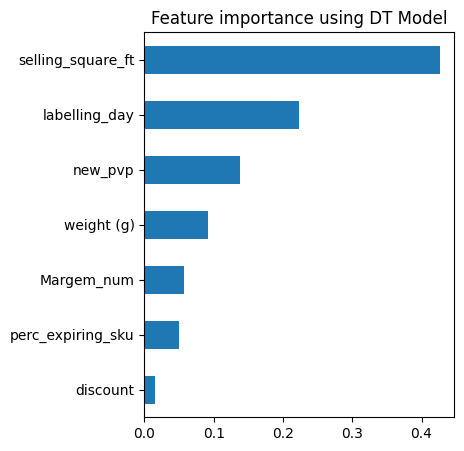

In [ ]:
select_best_features(X4, y4)

### Resumo

| Predictor | RFE | Lasso | DT | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- |
Selling_square_ft      | 5 YES | 5 YES | 5 YES | KEEP |
labelling_day             | 5 YES | 5 YES | 5 YES | KEEP - passa a with or without |
new_pvp             | 5 YES | 5 YES | 5 YES | KEEP |
weight (g)         | 5 YES | 5 YES | 5 YES | KEEP |
Margem_num         | 0 YES | 0 YES | 5 YES | TRY WITH AND WITHOUT |
perc_expiring_sku | 5 YES | 5 YES | 5 YES | KEEP |
discount    | 0 YES | 0 YES | 0 YES | Será KEEP |


apesar de discount ter um valor baixo de relevância pelos métodos, deverá ser considerado.

In [ ]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'perc_expiring_sku', 'sold', 'type', 'selling_square_ft', 'district',
       'new_pvp', 'discount', 'Margem_num', 'selling_day',
       'vida_util_apos_label', 'labelling_day_of_week', 'labelling_day',
       'new_pvp_calculado', 'diferenca_new_pvp', 'dif_sell_labelling_date',
       'dif_exp_labelling_date', 'labelling_day_8', 'labelling_day_15',
       'labelling_day_23'],
      dtype='object')

In [ ]:
keep_data = db[['selling_square_ft','new_pvp','weight (g)','perc_expiring_sku','discount','district','labelling_day_of_week','labelling_day_8','sold']].copy()

all_data1 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','sold']].copy()
all_data2 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_23','sold']].copy()
all_data3 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','labelling_day_23','sold']].copy()

all_data4 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','sold']].copy()
all_data5 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_23','sold']].copy()
all_data6 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','labelling_day_23','sold']].copy()

all_data7 =  db[['selling_square_ft','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','sold']].copy()
all_data8 =  db[['selling_square_ft','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_23','sold']].copy()
all_data9 =  db[['selling_square_ft','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','labelling_day_15','labelling_day_23','sold']].copy()

all_data10 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','sold']].copy()
all_data11 =  db[['selling_square_ft','labelling_day','new_pvp','weight (g)','perc_expiring_sku','discount','district','labelling_day_of_week','labelling_day_8','sold']].copy()
all_data12 =  db[['selling_square_ft','new_pvp','weight (g)','perc_expiring_sku', 'Margem_num','discount','district','labelling_day_of_week','labelling_day_8','sold']].copy()

In [ ]:
keep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150053 entries, 0 to 150052
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   selling_square_ft      150053 non-null  float64
 1   new_pvp                150053 non-null  float64
 2   weight (g)             150053 non-null  float64
 3   perc_expiring_sku      150053 non-null  float64
 4   discount               150053 non-null  float64
 5   district               150053 non-null  object 
 6   labelling_day_of_week  150053 non-null  object 
 7   labelling_day_8        150053 non-null  bool   
 8   sold                   150053 non-null  bool   
dtypes: bool(2), float64(5), object(2)
memory usage: 8.3+ MB


# 6. Model

## 6.1 Model Selection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_keep_data = keep_data.iloc[:,:-1]
y_keep_data = keep_data.iloc[:,-1]

X, X_test, y, y_test = train_test_split(X_keep_data, y_keep_data,
                                        train_size = 0.9,
                                        random_state = 99,
                                        stratify = y_keep_data)
keep_data = pd.concat([X, y], axis=1)

In [ ]:
all_data = [all_data1,all_data2,all_data3,all_data4,all_data5,all_data6,all_data7,all_data8,all_data9,all_data10,all_data11,all_data12]

for data in all_data:
  X_all_data = data.iloc[:,:-1]
  y_all_data = data.iloc[:,-1]
  X, X_test, y, y_test = train_test_split(X_all_data, y_all_data,
                                        train_size = 0.9,
                                        random_state = 99,
                                        stratify = y_all_data)
  all = pd.concat([X, y], axis=1)

In [ ]:
def transform_data(X_train, X_2nd_df = False, X_2nd_df_flag = False):


    ########################################## CREATE DUMMIES #################################################
    # Create dummies and remove one of the variables (to avoid multicollinearity)
    X_train_dummies = pd.get_dummies(X_train)

    ############################################ SCALE DATA ###################################################
    scaler = MinMaxScaler().fit(X_train_dummies)
    X_train_scaled = scaler.transform(X_train_dummies)
    X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train_dummies.columns)

    if X_2nd_df_flag == True:


        ########################################## CREATE DUMMIES #############################################
        X_2nd_df_dummies = pd.get_dummies(X_2nd_df)

        # If we don't have all the values in the validation dataset that we have in the train, that column will not be created
        # We should assure that all columns in train are also present in validation
        # Get missing columns from the training dataset
        missing_cols = set(X_train_dummies.columns ) - set(X_2nd_df_dummies.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            X_2nd_df_dummies[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        X_2nd_df_dummies = X_2nd_df_dummies[X_train_dummies.columns]

        if 'sold' in X_2nd_df_dummies.columns: #para tirar a variável dependente se estiver no conjunto para validação
            X_2nd_df_dummies.drop(['sold'], axis=1, inplace=True)
        else:
            pass

        ############################################ SCALE DATA ###################################################
        X_2nd_df_scaled = scaler.transform(X_2nd_df_dummies) # Scaling with 'scaler' from train data
        X_2nd_df_scaled = pd.DataFrame(X_2nd_df_scaled , columns = X_2nd_df_dummies.columns, index = X_2nd_df_dummies.index )


    if X_2nd_df_flag == False:
        return X_train_scaled
    else:
        return X_train_scaled, X_2nd_df_scaled

In [ ]:
def select_best_models(data, model): #vai treinar e avaliar qualquer model que eu lhe dê; recebe dados (alldata e keep data), inicializa o kfold e separa o X e o y e para cada iteração separa o treino e a validação
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('sold', axis = 1)
    y = data['sold'].copy()
    score_train, score_val = [],[] #duas listas para os f1 scores e treino de validação

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Change categorical data - call function "transform_data"
        X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

        # Apply model
        model.fit(X_train, y_train) #treina o modelo para ver como o X vai dar o y, está a aprender as relações, só com dados de treino
        predictions_train = model.predict(X_train) #quer os dados X porque vai prever o y (finge que nunca viu as respostas), aplica essas relações
        predictions_val = model.predict(X_val) #aqui vai dar aplicar as relações e dar predict no df da validação
        score_train.append(f1_score(y_train, predictions_train)) #vai calcular o f1score do treino e compara (finge que nunca viu as respostas)
        score_val.append(f1_score(y_val, predictions_val)) #vai calcular o f1score da validação e compara

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [ ]:
def show_results(df, data, *args): #função para mostrar os resultados; com o *args podemos passar vários argumentos diferentes
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val) #aqui vai guardar no dataframe vazio dos resultados
        count+=1
    return df

In [ ]:
model_LR = LogisticRegression(random_state=99)
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth=3, random_state=99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','KNN','DT'])

In [ ]:
show_results(df_all, keep_data, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.791+/-0.0,0.708+/-0.0
DT,0.66+/-0.0,0.66+/-0.0


In [ ]:
show_results(df_all, all_data1, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.667+/-0.0,0.667+/-0.0
KNN,0.799+/-0.0,0.727+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data2, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.667+/-0.0,0.667+/-0.0
KNN,0.799+/-0.0,0.727+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data3, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.668+/-0.0,0.667+/-0.0
KNN,0.799+/-0.0,0.727+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data4, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.799+/-0.0,0.726+/-0.0
DT,0.657+/-0.01,0.657+/-0.01


In [ ]:
show_results(df_all, all_data5, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.665+/-0.0
KNN,0.799+/-0.0,0.726+/-0.0
DT,0.657+/-0.01,0.657+/-0.01


In [ ]:
show_results(df_all, all_data6, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.799+/-0.0,0.726+/-0.0
DT,0.657+/-0.01,0.657+/-0.01


In [ ]:
show_results(df_all, all_data7, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.668+/-0.0,0.667+/-0.0
KNN,0.798+/-0.0,0.726+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data8, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.798+/-0.0,0.726+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data9, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.667+/-0.0,0.667+/-0.0
KNN,0.799+/-0.0,0.727+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data10, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.667+/-0.0,0.667+/-0.0
KNN,0.799+/-0.0,0.727+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


In [ ]:
show_results(df_all, all_data11, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.799+/-0.0,0.726+/-0.0
DT,0.657+/-0.01,0.657+/-0.01


In [ ]:
show_results(df_all, all_data12, model_LR, model_KNN, model_DT)

,Train,Validation
Logistic Regression,0.666+/-0.0,0.666+/-0.0
KNN,0.796+/-0.0,0.725+/-0.0
DT,0.666+/-0.02,0.666+/-0.01


Melhores resultados obtidos:

Dataframes all_data1, all_data3 e all_data9.

Apesar de terem o mesmo resultado, decidimos retirar o all_Data2 e all_data10 porque não considerava o labelling_day_15 e isso foi um erro de nossa parte. Deveria ser sempre considerado.

## 6.2 Model Optimization

### 6.2.1 KNN

In [ ]:
def point_plot(train, validation, values_try): #fazer um plot de linhas e vai experimentar os k's para vermos quantos queremos no knn
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [ ]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val = [],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value) #para x vizinhos, inicializa o modelo;

    for i, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)

    print(results_train)
    print(results_val)


    return results_train, results_val

#### 6.2.1.1 KNN all_data1

[np.float64(0.804), np.float64(0.814), np.float64(0.799), np.float64(0.78), np.float64(0.764)]
[np.float64(0.738), np.float64(0.739), np.float64(0.727), np.float64(0.714), np.float64(0.705)]


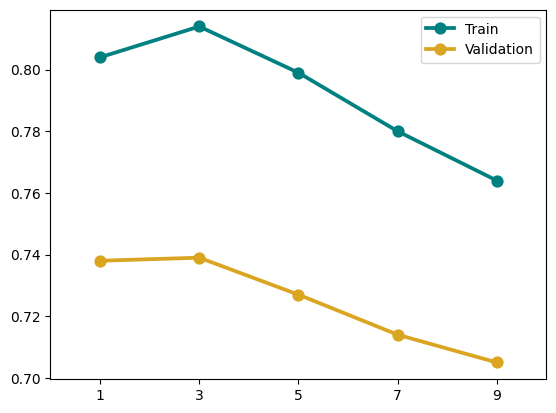

In [ ]:
values_try = [1,3,5,7,9] #os k's (nº de vizinhos) que quero testar
results_train, results_val = get_models_knn(all_data1, values_try)
point_plot(results_train, results_val, values_try) #a primeira lista é o f1 score para os diferentes k em treino , a segunda em validação

#### 6.2.1.2 KNN all_data3

[np.float64(0.804), np.float64(0.814), np.float64(0.799), np.float64(0.78)]
[np.float64(0.738), np.float64(0.739), np.float64(0.727), np.float64(0.714)]


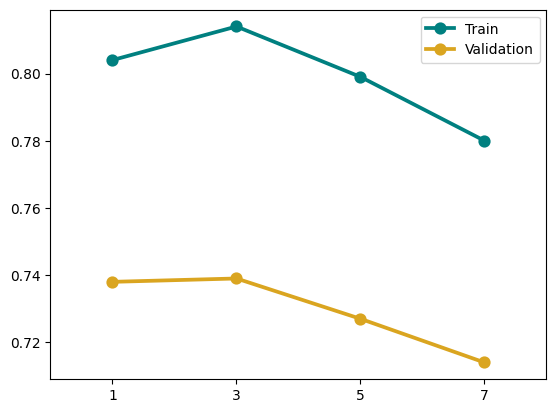

In [ ]:
values_try = [1,3,5,7] #os k's (nº de vizinhos) que quero testar
results_train, results_val = get_models_knn(all_data3, values_try)
point_plot(results_train, results_val, values_try) #a primeira lista é o f1 score para os diferentes k em treino , a segunda em validação

#### 6.2.1.3 KNN all_data9

[np.float64(0.803), np.float64(0.814), np.float64(0.799), np.float64(0.78)]
[np.float64(0.738), np.float64(0.74), np.float64(0.727), np.float64(0.714)]


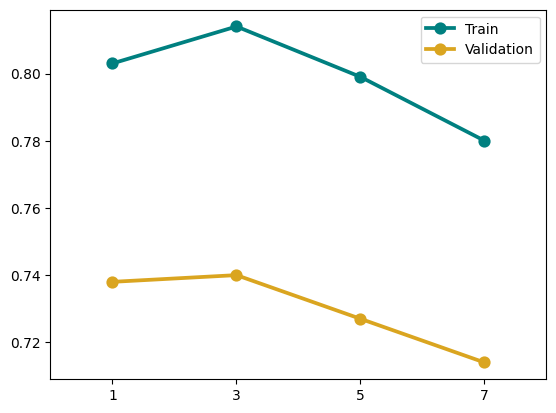

In [ ]:
values_try = [1,3,5,7] #os k's (nº de vizinhos) que quero testar
results_train, results_val = get_models_knn(all_data9, values_try)
point_plot(results_train, results_val, values_try) #a primeira lista é o f1 score para os diferentes k em treino , a segunda em validação

In [ ]:
final_model_knn1 = KNeighborsClassifier(n_neighbors = 1) #guardamos a config. final que queremos
final_model_knn3 = KNeighborsClassifier(n_neighbors = 3)

__OTHER IMPORTANT HYPERPARAMETERS:__

|Parameter| Definition | Options | Default |
|---|---|---|---|
| weights| Weight function used in prediction. | Uniform, Distance | Uniform |
| algorithm | Algorithm used to compute the nearest neighbors. | ball_tree, kd_tree, brute, auto | auto |
| metric | Metric to use for distance computation. | Callable | Euclidean Distance |

### 6.2.2 Decision Tree

#### 6.2.2.1 Random Search

##### 6.2.2.1.1 all_data1

In [ ]:
datarandomsearch1 = all_data1.copy()

X_data1 = datarandomsearch1.drop(['sold'], axis = 1)
y_data1 = datarandomsearch1['sold'].copy()

X_data1 = transform_data(X_train = X_data1, X_2nd_df_flag = False)

##### 6.2.2.1.2 all_data3

In [ ]:
datarandomsearch2 = all_data3.copy()

X_data2 = datarandomsearch2.drop(['sold'], axis = 1)
y_data2 = datarandomsearch2['sold'].copy()

X_data2 = transform_data(X_train = X_data2, X_2nd_df_flag = False)

##### 6.2.2.1.3 all_data9

In [ ]:
datarandomsearch3 = all_data9.copy()

X_data3 = datarandomsearch3.drop(['sold'], axis = 1)
y_data3 = datarandomsearch3['sold'].copy()

X_data3 = transform_data(X_train = X_data3, X_2nd_df_flag = False)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 99)

In [ ]:
parameter_space_random  = {
    'criterion': ['gini', 'entropy','log_loss'], #que tipo de critérios queremos
    'max_depth': [2, 3, 4, 5], #testa diferentes depths, nº de niveis por assim dizer
    'min_samples_split': [2, 4, 6, 8, 10], #nº minimo de obs que queremos em cada folha
}

#### 6.2.2.2 Random Search

In [ ]:
random_search = RandomizedSearchCV(dt, param_distributions=parameter_space_random, #digo-lhe os parâmetros que quero são os de cima
                                   scoring = 'f1', cv=5, random_state = 99)

In [ ]:
random_search.fit(X_data1, y_data1)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'min_samples_split': 6, 'max_depth': 3, 'criterion': 'gini'}
Best Score:  0.591167080037134


In [ ]:
random_search.fit(X_data2, y_data2)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'min_samples_split': 6, 'max_depth': 3, 'criterion': 'gini'}
Best Score:  0.591167080037134


In [ ]:
random_search.fit(X_data3, y_data3)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'min_samples_split': 6, 'max_depth': 3, 'criterion': 'gini'}
Best Score:  0.591167080037134


#### 6.2.2.3 Grid Search

In [ ]:
parameter_space_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
}

In [ ]:
grid_search = GridSearchCV(dt, parameter_space_grid, scoring = 'f1', return_train_score = True, cv = 5)

In [ ]:
grid_search.fit(X_data1, y_data1)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score:  0.591167080037134


In [ ]:
grid_search.fit(X_data2, y_data2)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score:  0.591167080037134


In [ ]:
grid_search.fit(X_data3, y_data3)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score:  0.591167080037134


In [ ]:
final_model_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 2) #ultimo modelo com os parametros dados pelo gridsearch

### 6.2.3 Linear Regression

#### 6.2.3.1 RandomizedSearchCV

In [ ]:
# 1. Define your Logistic Regression model
lr = LogisticRegression(random_state=99)  # You can include initial settings here if desired

# 2. Define the hyperparameter search space
parameter_space_random_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500],
}

# 3. Create the RandomizedSearchCV object
random_search_lr = RandomizedSearchCV(
    lr,
    param_distributions=parameter_space_random_lr,
    scoring='f1',  # Or another appropriate metric like 'accuracy'
    cv=5,
    random_state=99,
    n_iter=10  # Number of random combinations to try (adjust as needed)
)


In [ ]:
# 4. Assuming you have your data in X_train and y_train:
random_search_lr.fit(X_data1, y_data1)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", random_search_lr.best_params_)
print("Best Score: ", random_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 0.001}
Best Score:  0.6983830953243377


In [ ]:
# 4. Assuming you have your data in X_train and y_train:
random_search_lr.fit(X_data2, y_data2)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", random_search_lr.best_params_)
print("Best Score: ", random_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 0.001}
Best Score:  0.6983830953243377


In [ ]:
# 4. Assuming you have your data in X_train and y_train:
random_search_lr.fit(X_data3, y_data3)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", random_search_lr.best_params_)
print("Best Score: ", random_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 0.001}
Best Score:  0.6983830953243377


#### 6.2.3.2 GridSearchCV

In [ ]:
# 2. Define the hyperparameter search space
parameter_space_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500],
}

# 3. Create the GridSearchCV object
grid_search_lr = GridSearchCV(
    lr,
    param_grid=parameter_space_grid_lr,  # Changed to param_grid
    scoring='f1',  # Or another appropriate metric like 'accuracy'
    cv=5,
)

In [ ]:
grid_search_lr.fit(X_data1, y_data1)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.6983830953243377


In [ ]:
grid_search_lr.fit(X_data2, y_data2)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.6983830953243377


In [ ]:
grid_search_lr.fit(X_data3, y_data3)

# 5. Print the best hyperparameters and corresponding score
print("Best Hyperparameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

Best Hyperparameters for Logistic Regression:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.6983830953243377


In [ ]:
final_model_lr = LogisticRegression(C=0.001, max_iter=100, penalty ='l1', solver= 'saga')

## 6.3 Selecionar o modelo vencedor

### 6.3.1 Compare the performance

In [ ]:
# df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN','Best DT'])
# show_results(df_final_models, keep_data, final_model_knn, final_model_dt) #aqui ficamos com um knn melhor mas com  mais overfitting

In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN', 'Best LR'])
show_results(df_final_models, all_data1, final_model_knn1, final_model_lr)

,Train,Validation
Best KNN,0.804+/-0.0,0.738+/-0.0
Best LR,0.698+/-0.0,0.698+/-0.0


In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN', 'Best LR'])
show_results(df_final_models, all_data3, final_model_knn1, final_model_lr)

,Train,Validation
Best KNN,0.804+/-0.0,0.738+/-0.0
Best LR,0.698+/-0.0,0.698+/-0.0


In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN', 'Best LR'])
show_results(df_final_models, all_data9, final_model_knn1, final_model_lr)

,Train,Validation
Best KNN,0.803+/-0.0,0.738+/-0.0
Best LR,0.698+/-0.0,0.698+/-0.0


In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN', 'Best LR'])
show_results(df_final_models, all_data1, final_model_knn3, final_model_lr)

,Train,Validation
Best KNN,0.814+/-0.0,0.739+/-0.0
Best LR,0.698+/-0.0,0.698+/-0.0


In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN'])
show_results(df_final_models, all_data9, final_model_knn3)

,Train,Validation
Best KNN,0.814+/-0.0,0.74+/-0.0


### 6.3.2 Plot a ROC Curve

In [ ]:
data = all_data9.copy()

X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  train_size = 0.8, #dos 90% que ficam, 80 para treino e 20 para validação
                                                  random_state = 99,
                                                  stratify = y_data)

In [ ]:
X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

model_knn = final_model_knn1.fit(X_train, y_train)
model_lr = final_model_lr.fit(X_train, y_train)

In [ ]:
prob_modelKNN = model_knn.predict_proba(X_val) #dá-lhe probabilidades de pertencerem à classe 0 ou à classe 1 - vê o nº dos vizinhos que são, dos 5. agora vamos definir se o threshold é 50 ou não
prob_modelLR =  model_lr.predict_proba(X_val) #dá a probabilidade de ser 0 ou 1 dentro da folha da DT

In [ ]:
fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val, prob_modelLR[:,1])

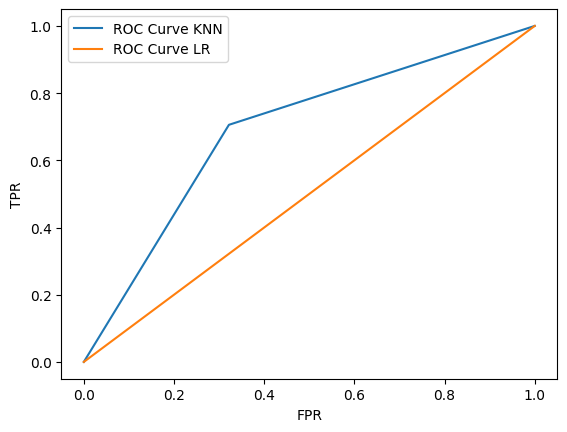

In [ ]:
plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
plt.plot(fpr_modelLR, tpr_modelLR, label="ROC Curve LR")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show() #vemos através daqui do ROC curve que o melhor modelo é a DT

### 6.3.3 Change the threshold

In [ ]:
final_model = final_model_knn1.fit(X_train, y_train)

In [ ]:
predict_proba = final_model.predict_proba(X_val)
predict_proba

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Best Threshold=1.000000, Precision=0.717, Recall=0.706, F-Score=0.711


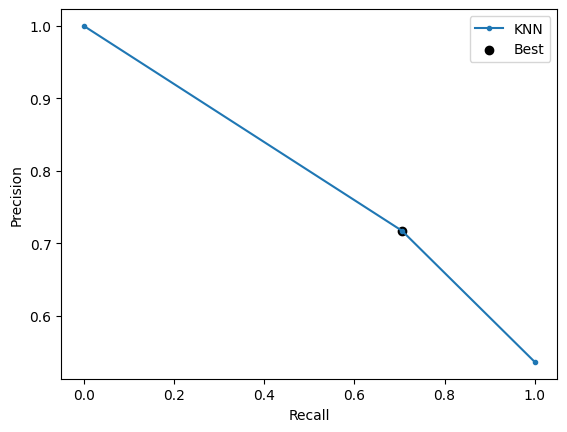

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1]) #thresholds são valores únicos das probabilidades acima

# apply f1 score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
precision_best = precision[ix] # Precision at best threshold
recall_best = recall[ix]       # Recall at best threshold
fscore_best = (2 * precision_best * recall_best) / (precision_best + recall_best)
print('Best Threshold=%f, Precision=%.3f, Recall=%.3f, F-Score=%.3f' % (thresholds[ix], precision_best, recall_best, fscore_best))

plt.plot(recall, precision, marker='.', label='KNN')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

__CONCLUSION__ <br>
Como se trata de um KNN só com 1 vizinho, esta análise nem faz muito sentido, porque será sempre 1.

### 6.3.4 Test the model

In [ ]:
train = all_data9.copy()

X_train = all_data9.drop(['sold'], axis = 1)
y_train = all_data9['sold']

In [ ]:
X_train, X_test = transform_data(X_train, X_test, X_2nd_df_flag = True)

In [ ]:
final_model = final_model_knn1.fit(X_train, y_train)

In [ ]:
final_model.predict(X_test) # the method predict() will predict the classes of your target when the threshold = 0.5

array([False,  True,  True, ...,  True,  True,  True])

In [ ]:
predict_proba_test = final_model.predict_proba(X_test)
predict_proba_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
test_pred = []

for value in predict_proba_test[:,1]:
    if (value>=1): #este era o nosso threshold ÓTIMO que tinhamos calculado; por isso passamos este ao nosso melhor
        test_pred.append(1)
    else:
        test_pred.append(0)

In [ ]:
f1_score(y_test, test_pred)

0.7252240973508939